In [3]:
!pip install pandas nltk seaborn matplotlib wordcloud


In [5]:
!pip list


Package                   Version
------------------------- --------------
anyio                     4.7.0
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 3.0.0
async-lru                 2.0.4
attrs                     24.3.0
babel                     2.16.0
beautifulsoup4            4.12.3
bleach                    6.2.0
certifi                   2024.12.14
cffi                      1.17.1
charset-normalizer        3.4.0
click                     8.1.8
colorama                  0.4.6
comm                      0.2.2
contourpy                 1.3.1
cycler                    0.12.1
debugpy                   1.8.11
decorator                 5.1.1
defusedxml                0.7.1
executing                 2.1.0
fastjsonschema            2.21.1
fonttools                 4.55.3
fqdn                      1.5.1
h11                       0.14.0
httpcore                  1.0.7
httpx                     0.28.1
idna        

In [6]:

import os
import pandas as pd
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud



Matplotlib is building the font cache; this may take a moment.


In [10]:
os.chdir("C:/Users/SpHuRaN/Desktop/Fortray/Assignment/Sentimental Analysis")

In [11]:
os.getcwd()

'C:\\Users\\SpHuRaN\\Desktop\\Fortray\\Assignment\\Sentimental Analysis'

In [12]:
instagram_data=pd.read_csv("instagram_meaningful_dataset.csv")
twitter_data=pd.read_csv("twitter_dataset_realistic.csv")

In [19]:
instagram_data


,Review ID,User ID,Age Group,Location,Review Text,Likes,Replies,Platform,cleaned_review,sentiment_score
0,91a65e3e-e89e-48dc-98ca-3548de0a6a09,af78d4e9-c788-4191-b777-173930c33d4a,Adults,Lake Jose,Terrible customer service. I will not be comin...,226,10,Instagram,terrible customer service i will not be coming...,-0.4767
1,a3294af7-82b3-4911-a4a1-be0088b5d1cf,87f36d08-7141-4a11-9afa-2558dbbd6a0b,Older Adults,West Mariahshire,"The service was excellent, and the staff was f...",218,18,Instagram,the service was excellent and the staff was fr...,0.7845
2,77640add-3499-4349-a4c8-401b294dd92e,927b4181-dd4b-4afb-9359-414b8d5d6e6a,Older Adults,Port Katie,Average experience. Nothing stood out.,203,17,Instagram,average experience nothing stood out,0.0000
3,c4b56ad5-27a5-45ad-8b08-a836b70b6ce2,8b9f6aed-839b-4aef-8dfe-42fe26b14892,Older Adults,West Patrickstad,I absolutely love this product! It exceeded my...,184,39,Instagram,i absolutely love this product it exceeded my ...,0.6697
4,f9390ef1-4637-4029-ab1a-b277c031d0f6,beb935eb-848c-4e14-a6c6-8e916fd84862,Children,Port Zachary,"The product does what it says, but nothing ext...",54,4,Instagram,the product does what it says but nothing extr...,0.0000
...,...,...,...,...,...,...,...,...,...,...
1995,9e5c0bde-91b1-4672-8fc7-c373a615f607,bfe77ba7-8d88-443a-aaed-f451585c48c7,Children,Benjaminmouth,This app is fantastic! It has helped me organi...,80,17,Instagram,this app is fantastic it has helped me organiz...,0.7579
1996,499cace2-d147-4b9e-9fe2-d7bc8334262b,37699acb-8ece-41a0-9bba-82653dc37e6e,Adults,West Amanda,"Decent service, but there is room for improvem...",26,25,Instagram,decent service but there is room for improvement,0.6124
1997,eca1bf88-69f8-42db-9c3a-5da9c4989fb1,07f98da4-30aa-4f48-9752-63e1380e4c40,Older Adults,Mitchellburgh,This app is fantastic! It has helped me organi...,124,4,Instagram,this app is fantastic it has helped me organiz...,0.7579
1998,79b4123c-e8f0-4c32-afbe-3efb7fbbee8d,50cc3955-6ad4-45d9-9c49-35fb36dc4fc7,Older Adults,Stephanieside,The product broke after just one use. Very dis...,170,42,Instagram,the product broke after just one use very disa...,-0.7346


In [63]:
twitter_data

,user_id,username,age_group,location,tweet,date,likes,retweets,replies,cleaned_tweets,sentiment_score,sentiment
0,6971,vvheresk,Adults,France,We need to do more to reduce plastic waste. Sm...,2024-10-06,553,255,43,we need to do more to reduce plastic waste sma...,-0.4019,Negative
2,7954,zapagorw,Young Adults,Australia,Why do people litter so much? Please keep our ...,2024-02-10,15,182,144,why do people litter so much please keep our p...,0.6461,Positive
4,5573,zsnridcd,Children,UK,Had an amazing day volunteering to plant trees...,2024-10-03,645,307,184,had an amazing day volunteering to plant trees...,0.5859,Positive
5,2908,etlydeix,Seniors,Canada,Not sure if my small efforts to recycle even m...,2024-06-04,482,293,138,not sure if my small efforts to recycle even m...,-0.5365,Negative
6,7117,iazkcwrz,Seniors,USA,Climate change is real and it's affecting us a...,2024-10-04,590,451,28,climate change is real and its affecting us al...,0.0000,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...
1983,2904,hkuxdhbh,Young Adults,Germany,I can't believe people still deny climate chan...,2024-03-01,75,450,149,i cant believe people still deny climate chang...,-0.7304,Negative
1990,9272,cwuoadll,Young Adults,Australia,Had an amazing day volunteering to plant trees...,2024-06-05,276,309,69,had an amazing day volunteering to plant trees...,0.5859,Positive
1993,9340,ynwbkqor,Children,UK,"Electric vehicles are cool, but we need more c...",2024-06-11,420,493,163,electric vehicles are cool but we need more ch...,0.1655,Positive
1998,2983,hquawykz,Adults,Brazil,We need to do more to reduce plastic waste. Sm...,2024-10-12,972,26,110,we need to do more to reduce plastic waste sma...,-0.4019,Negative


In [64]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"\@\w+|\#", '', text)
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # Remove URLs
    text = re.sub(r"[^\w\s]", '', text)  
    return text
    


In [22]:
   instagram_data['cleaned_review'] = instagram_data['Review Text'].apply(clean_text)


In [65]:
twitter_data['cleaned_tweets'] = twitter_data['tweet'].apply(clean_text)

C:\Users\SpHuRaN\AppData\Local\Temp\ipykernel_14072\1430719991.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_data['cleaned_tweets'] = twitter_data['tweet'].apply(clean_text)


In [53]:
twitter_data['date'] = pd.to_datetime(twitter_data['date'], errors='coerce')

# Check for invalid dates (if any)
invalid_dates = twitter_data[twitter_data['date'].isna()]
if not invalid_dates.empty:
    print("Invalid dates found:\n", invalid_dates)

# Format the 'date' column to a single format (e.g., YYYY-MM-DD)
twitter_data['date'] = twitter_data['date'].dt.strftime('%Y-%m-%d')

Invalid dates found:
       user_id  username     age_group   location  \
1        3984  vsbgvllb      Children     France   
3        3165  fqqyhcae  Young Adults  Australia   
10       8237  mfqvscpw  Young Adults    Germany   
12       9118  bljfwhfn  Young Adults         UK   
16       2495  bnopwury        Adults     France   
...       ...       ...           ...        ...   
1992     2206  msnzccfe  Young Adults    Germany   
1994     3448  sytcqcnl        Adults         UK   
1995     9124  lkdxrrum        Adults     France   
1996     9237  pglmqqsy  Young Adults     Canada   
1997     6842  cujkgihb  Young Adults     France   

                                                  tweet date  likes  retweets  \
1     Renewable energy is the future. Let's invest i...  NaT    570       423   
3     Why do people litter so much? Please keep our ...  NaT    567       108   
10    We need to do more to reduce plastic waste. Sm...  NaT     12       459   
12    Climate change is real 

In [48]:
print(twitter_data['date'].head())

0    2024-10-06
1           NaN
2    2024-02-10
3           NaN
4    2024-10-03
Name: date, dtype: object


In [23]:
instagram_data


,Review ID,User ID,Age Group,Location,Review Text,Likes,Replies,Platform,cleaned_review,sentiment_score
0,91a65e3e-e89e-48dc-98ca-3548de0a6a09,af78d4e9-c788-4191-b777-173930c33d4a,Adults,Lake Jose,Terrible customer service. I will not be comin...,226,10,Instagram,terrible customer service i will not be coming...,-0.4767
1,a3294af7-82b3-4911-a4a1-be0088b5d1cf,87f36d08-7141-4a11-9afa-2558dbbd6a0b,Older Adults,West Mariahshire,"The service was excellent, and the staff was f...",218,18,Instagram,the service was excellent and the staff was fr...,0.7845
2,77640add-3499-4349-a4c8-401b294dd92e,927b4181-dd4b-4afb-9359-414b8d5d6e6a,Older Adults,Port Katie,Average experience. Nothing stood out.,203,17,Instagram,average experience nothing stood out,0.0000
3,c4b56ad5-27a5-45ad-8b08-a836b70b6ce2,8b9f6aed-839b-4aef-8dfe-42fe26b14892,Older Adults,West Patrickstad,I absolutely love this product! It exceeded my...,184,39,Instagram,i absolutely love this product it exceeded my ...,0.6697
4,f9390ef1-4637-4029-ab1a-b277c031d0f6,beb935eb-848c-4e14-a6c6-8e916fd84862,Children,Port Zachary,"The product does what it says, but nothing ext...",54,4,Instagram,the product does what it says but nothing extr...,0.0000
...,...,...,...,...,...,...,...,...,...,...
1995,9e5c0bde-91b1-4672-8fc7-c373a615f607,bfe77ba7-8d88-443a-aaed-f451585c48c7,Children,Benjaminmouth,This app is fantastic! It has helped me organi...,80,17,Instagram,this app is fantastic it has helped me organiz...,0.7579
1996,499cace2-d147-4b9e-9fe2-d7bc8334262b,37699acb-8ece-41a0-9bba-82653dc37e6e,Adults,West Amanda,"Decent service, but there is room for improvem...",26,25,Instagram,decent service but there is room for improvement,0.6124
1997,eca1bf88-69f8-42db-9c3a-5da9c4989fb1,07f98da4-30aa-4f48-9752-63e1380e4c40,Older Adults,Mitchellburgh,This app is fantastic! It has helped me organi...,124,4,Instagram,this app is fantastic it has helped me organiz...,0.7579
1998,79b4123c-e8f0-4c32-afbe-3efb7fbbee8d,50cc3955-6ad4-45d9-9c49-35fb36dc4fc7,Older Adults,Stephanieside,The product broke after just one use. Very dis...,170,42,Instagram,the product broke after just one use very disa...,-0.7346


In [66]:
twitter_data

,user_id,username,age_group,location,tweet,date,likes,retweets,replies,cleaned_tweets,sentiment_score,sentiment
0,6971,vvheresk,Adults,France,We need to do more to reduce plastic waste. Sm...,2024-10-06,553,255,43,we need to do more to reduce plastic waste sma...,-0.4019,Negative
2,7954,zapagorw,Young Adults,Australia,Why do people litter so much? Please keep our ...,2024-02-10,15,182,144,why do people litter so much please keep our p...,0.6461,Positive
4,5573,zsnridcd,Children,UK,Had an amazing day volunteering to plant trees...,2024-10-03,645,307,184,had an amazing day volunteering to plant trees...,0.5859,Positive
5,2908,etlydeix,Seniors,Canada,Not sure if my small efforts to recycle even m...,2024-06-04,482,293,138,not sure if my small efforts to recycle even m...,-0.5365,Negative
6,7117,iazkcwrz,Seniors,USA,Climate change is real and it's affecting us a...,2024-10-04,590,451,28,climate change is real and its affecting us al...,0.0000,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...
1983,2904,hkuxdhbh,Young Adults,Germany,I can't believe people still deny climate chan...,2024-03-01,75,450,149,i cant believe people still deny climate chang...,-0.7304,Negative
1990,9272,cwuoadll,Young Adults,Australia,Had an amazing day volunteering to plant trees...,2024-06-05,276,309,69,had an amazing day volunteering to plant trees...,0.5859,Positive
1993,9340,ynwbkqor,Children,UK,"Electric vehicles are cool, but we need more c...",2024-06-11,420,493,163,electric vehicles are cool but we need more ch...,0.1655,Positive
1998,2983,hquawykz,Adults,Brazil,We need to do more to reduce plastic waste. Sm...,2024-10-12,972,26,110,we need to do more to reduce plastic waste sma...,-0.4019,Negative


In [67]:
instagram_data = instagram_data.dropna()
twitter_data = twitter_data.dropna()


In [25]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import download

download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

instagram_data['sentiment_score'] = instagram_data['cleaned_review'].apply(lambda x: sid.polarity_scores(x)['compound'])



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\SpHuRaN\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [26]:
instagram_data

,Review ID,User ID,Age Group,Location,Review Text,Likes,Replies,Platform,cleaned_review,sentiment_score
0,91a65e3e-e89e-48dc-98ca-3548de0a6a09,af78d4e9-c788-4191-b777-173930c33d4a,Adults,Lake Jose,Terrible customer service. I will not be comin...,226,10,Instagram,terrible customer service i will not be coming...,-0.4767
1,a3294af7-82b3-4911-a4a1-be0088b5d1cf,87f36d08-7141-4a11-9afa-2558dbbd6a0b,Older Adults,West Mariahshire,"The service was excellent, and the staff was f...",218,18,Instagram,the service was excellent and the staff was fr...,0.7845
2,77640add-3499-4349-a4c8-401b294dd92e,927b4181-dd4b-4afb-9359-414b8d5d6e6a,Older Adults,Port Katie,Average experience. Nothing stood out.,203,17,Instagram,average experience nothing stood out,0.0000
3,c4b56ad5-27a5-45ad-8b08-a836b70b6ce2,8b9f6aed-839b-4aef-8dfe-42fe26b14892,Older Adults,West Patrickstad,I absolutely love this product! It exceeded my...,184,39,Instagram,i absolutely love this product it exceeded my ...,0.6697
4,f9390ef1-4637-4029-ab1a-b277c031d0f6,beb935eb-848c-4e14-a6c6-8e916fd84862,Children,Port Zachary,"The product does what it says, but nothing ext...",54,4,Instagram,the product does what it says but nothing extr...,0.0000
...,...,...,...,...,...,...,...,...,...,...
1995,9e5c0bde-91b1-4672-8fc7-c373a615f607,bfe77ba7-8d88-443a-aaed-f451585c48c7,Children,Benjaminmouth,This app is fantastic! It has helped me organi...,80,17,Instagram,this app is fantastic it has helped me organiz...,0.7579
1996,499cace2-d147-4b9e-9fe2-d7bc8334262b,37699acb-8ece-41a0-9bba-82653dc37e6e,Adults,West Amanda,"Decent service, but there is room for improvem...",26,25,Instagram,decent service but there is room for improvement,0.6124
1997,eca1bf88-69f8-42db-9c3a-5da9c4989fb1,07f98da4-30aa-4f48-9752-63e1380e4c40,Older Adults,Mitchellburgh,This app is fantastic! It has helped me organi...,124,4,Instagram,this app is fantastic it has helped me organiz...,0.7579
1998,79b4123c-e8f0-4c32-afbe-3efb7fbbee8d,50cc3955-6ad4-45d9-9c49-35fb36dc4fc7,Older Adults,Stephanieside,The product broke after just one use. Very dis...,170,42,Instagram,the product broke after just one use very disa...,-0.7346


In [68]:
twitter_data['sentiment_score'] = twitter_data['cleaned_tweets'].apply(lambda x: sid.polarity_scores(x)['compound'])

In [58]:
twitter_data

,user_id,username,age_group,location,tweet,date,likes,retweets,replies,cleaned_tweets,sentiment_score,sentiment
0,6971,vvheresk,Adults,France,We need to do more to reduce plastic waste. Sm...,2024-10-06,553,255,43,we need to do more to reduce plastic waste sma...,-0.4019,Negative
2,7954,zapagorw,Young Adults,Australia,Why do people litter so much? Please keep our ...,2024-02-10,15,182,144,why do people litter so much please keep our p...,0.6461,Positive
4,5573,zsnridcd,Children,UK,Had an amazing day volunteering to plant trees...,2024-10-03,645,307,184,had an amazing day volunteering to plant trees...,0.5859,Positive
5,2908,etlydeix,Seniors,Canada,Not sure if my small efforts to recycle even m...,2024-06-04,482,293,138,not sure if my small efforts to recycle even m...,-0.5365,Negative
6,7117,iazkcwrz,Seniors,USA,Climate change is real and it's affecting us a...,2024-10-04,590,451,28,climate change is real and its affecting us al...,0.0000,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...
1983,2904,hkuxdhbh,Young Adults,Germany,I can't believe people still deny climate chan...,2024-03-01,75,450,149,i cant believe people still deny climate chang...,-0.7304,Negative
1990,9272,cwuoadll,Young Adults,Australia,Had an amazing day volunteering to plant trees...,2024-06-05,276,309,69,had an amazing day volunteering to plant trees...,0.5859,Positive
1993,9340,ynwbkqor,Children,UK,"Electric vehicles are cool, but we need more c...",2024-06-11,420,493,163,electric vehicles are cool but we need more ch...,0.1655,Positive
1998,2983,hquawykz,Adults,Brazil,We need to do more to reduce plastic waste. Sm...,2024-10-12,972,26,110,we need to do more to reduce plastic waste sma...,-0.4019,Negative


In [69]:
def classify_sentiment(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

instagram_data['sentiment'] = instagram_data['sentiment_score'].apply(classify_sentiment)

In [70]:
twitter_data['sentiment'] = twitter_data['sentiment_score'].apply(classify_sentiment)

In [31]:
instagram_data

,Review ID,User ID,Age Group,Location,Review Text,Likes,Replies,Platform,cleaned_review,sentiment_score,sentiment
0,91a65e3e-e89e-48dc-98ca-3548de0a6a09,af78d4e9-c788-4191-b777-173930c33d4a,Adults,Lake Jose,Terrible customer service. I will not be comin...,226,10,Instagram,terrible customer service i will not be coming...,-0.4767,Negative
1,a3294af7-82b3-4911-a4a1-be0088b5d1cf,87f36d08-7141-4a11-9afa-2558dbbd6a0b,Older Adults,West Mariahshire,"The service was excellent, and the staff was f...",218,18,Instagram,the service was excellent and the staff was fr...,0.7845,Positive
2,77640add-3499-4349-a4c8-401b294dd92e,927b4181-dd4b-4afb-9359-414b8d5d6e6a,Older Adults,Port Katie,Average experience. Nothing stood out.,203,17,Instagram,average experience nothing stood out,0.0000,Neutral
3,c4b56ad5-27a5-45ad-8b08-a836b70b6ce2,8b9f6aed-839b-4aef-8dfe-42fe26b14892,Older Adults,West Patrickstad,I absolutely love this product! It exceeded my...,184,39,Instagram,i absolutely love this product it exceeded my ...,0.6697,Positive
4,f9390ef1-4637-4029-ab1a-b277c031d0f6,beb935eb-848c-4e14-a6c6-8e916fd84862,Children,Port Zachary,"The product does what it says, but nothing ext...",54,4,Instagram,the product does what it says but nothing extr...,0.0000,Neutral
...,...,...,...,...,...,...,...,...,...,...,...
1995,9e5c0bde-91b1-4672-8fc7-c373a615f607,bfe77ba7-8d88-443a-aaed-f451585c48c7,Children,Benjaminmouth,This app is fantastic! It has helped me organi...,80,17,Instagram,this app is fantastic it has helped me organiz...,0.7579,Positive
1996,499cace2-d147-4b9e-9fe2-d7bc8334262b,37699acb-8ece-41a0-9bba-82653dc37e6e,Adults,West Amanda,"Decent service, but there is room for improvem...",26,25,Instagram,decent service but there is room for improvement,0.6124,Positive
1997,eca1bf88-69f8-42db-9c3a-5da9c4989fb1,07f98da4-30aa-4f48-9752-63e1380e4c40,Older Adults,Mitchellburgh,This app is fantastic! It has helped me organi...,124,4,Instagram,this app is fantastic it has helped me organiz...,0.7579,Positive
1998,79b4123c-e8f0-4c32-afbe-3efb7fbbee8d,50cc3955-6ad4-45d9-9c49-35fb36dc4fc7,Older Adults,Stephanieside,The product broke after just one use. Very dis...,170,42,Instagram,the product broke after just one use very disa...,-0.7346,Negative


In [61]:
twitter_data

,user_id,username,age_group,location,tweet,date,likes,retweets,replies,cleaned_tweets,sentiment_score,sentiment
0,6971,vvheresk,Adults,France,We need to do more to reduce plastic waste. Sm...,2024-10-06,553,255,43,we need to do more to reduce plastic waste sma...,-0.4019,Negative
2,7954,zapagorw,Young Adults,Australia,Why do people litter so much? Please keep our ...,2024-02-10,15,182,144,why do people litter so much please keep our p...,0.6461,Positive
4,5573,zsnridcd,Children,UK,Had an amazing day volunteering to plant trees...,2024-10-03,645,307,184,had an amazing day volunteering to plant trees...,0.5859,Positive
5,2908,etlydeix,Seniors,Canada,Not sure if my small efforts to recycle even m...,2024-06-04,482,293,138,not sure if my small efforts to recycle even m...,-0.5365,Negative
6,7117,iazkcwrz,Seniors,USA,Climate change is real and it's affecting us a...,2024-10-04,590,451,28,climate change is real and its affecting us al...,0.0000,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...
1983,2904,hkuxdhbh,Young Adults,Germany,I can't believe people still deny climate chan...,2024-03-01,75,450,149,i cant believe people still deny climate chang...,-0.7304,Negative
1990,9272,cwuoadll,Young Adults,Australia,Had an amazing day volunteering to plant trees...,2024-06-05,276,309,69,had an amazing day volunteering to plant trees...,0.5859,Positive
1993,9340,ynwbkqor,Children,UK,"Electric vehicles are cool, but we need more c...",2024-06-11,420,493,163,electric vehicles are cool but we need more ch...,0.1655,Positive
1998,2983,hquawykz,Adults,Brazil,We need to do more to reduce plastic waste. Sm...,2024-10-12,972,26,110,we need to do more to reduce plastic waste sma...,-0.4019,Negative


In [37]:
instagram_data.to_csv('processed_instagram_data.csv', index=False)



In [71]:
twitter_data.to_csv('processed4_twitter_data.csv', index=False)

NameError: name 'processed_instagram_data' is not defined

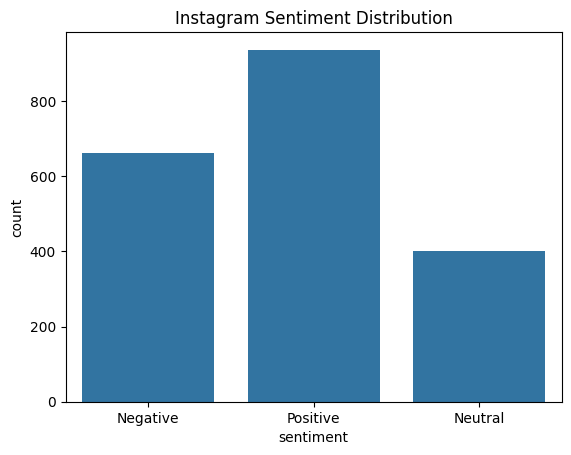

In [39]:


sns.countplot(data=instagram_data, x='sentiment')
plt.title('Instagram Sentiment Distribution')
plt.show()



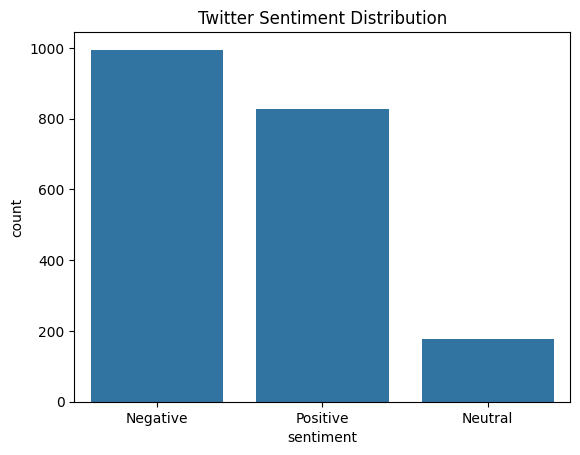

In [40]:
sns.countplot(data=twitter_data, x='sentiment')
plt.title('Twitter Sentiment Distribution')
plt.show()


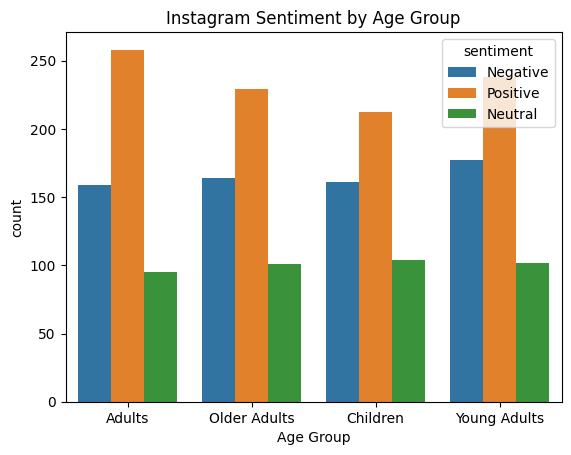

In [41]:
sns.countplot(data=instagram_data, x='Age Group', hue='sentiment')
plt.title('Instagram Sentiment by Age Group')
plt.show()



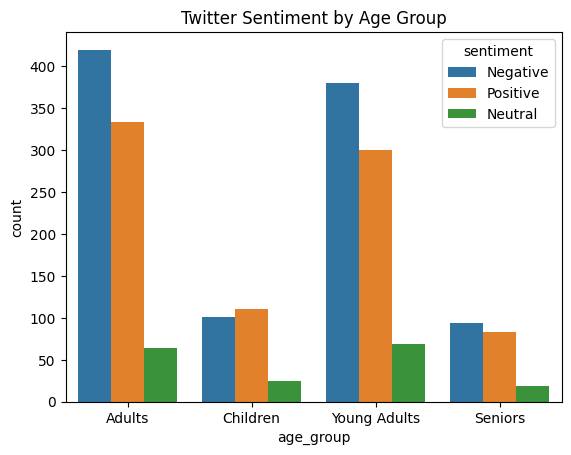

In [44]:
sns.countplot(data=twitter_data, x='age_group', hue='sentiment')
plt.title('Twitter Sentiment by Age Group')
plt.show()

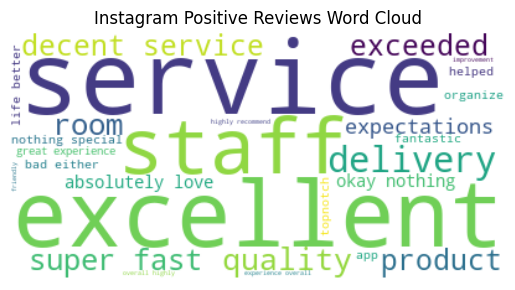

In [45]:

positive_instagram = ' '.join(instagram_data[instagram_data['sentiment'] == 'Positive']['cleaned_review'])
wordcloud_instagram = WordCloud(background_color='white').generate(positive_instagram)

plt.imshow(wordcloud_instagram, interpolation='bilinear')
plt.axis('off')
plt.title('Instagram Positive Reviews Word Cloud')
plt.show()
